In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
Y = digits.target

In [3]:
X.shape, Y.shape

((1797, 64), (1797,))

In [4]:
random_index = np.arange(n_samples)
np.random.shuffle(random_index)
random_index[:100]

array([1793, 1763,   84, 1064, 1338,  977,  942,  879, 1510, 1038, 1538,
        719,  845,  695,  538, 1520,  152,  785, 1683,   60, 1048,  101,
          0, 1109,  659,  445,  376,  306, 1485,  810,  524,  539,  222,
         19, 1618, 1755, 1274,  796,  595, 1325,  688, 1502, 1265,  946,
       1789,  417, 1393, 1440,  416,  309,  998,  443, 1243,  933,  410,
        818, 1492,  909,   27, 1610,  584,  819,  887,  564, 1107,  138,
         66, 1489,  428,  556,   75, 1268,  952,   24,  279, 1010,  254,
       1619, 1276,  153,   53,  204,  969,  349, 1096, 1660,  643,    7,
       1525,  701,   47, 1430,  148,  585,  276, 1257,   35, 1548,  103,
        406])

In [5]:
fold_count = int(n_samples / 10)
fold_count

179

In [6]:
training_index = random_index[:fold_count*6]
validation_index = random_index[fold_count*6:fold_count*8]
test_index = random_index[fold_count*8:] 

training_index.shape, validation_index.shape, test_index.shape

((1074,), (358,), (365,))

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

iter_counts = [i for i in range(1, 2000, 10)]
training_accuracy = []
validation_accuracy = []

for iter_count in iter_counts:
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
        hidden_layer_sizes=(3, 2), random_state=1, max_iter=iter_count, early_stopping=False)
    clf.fit(X[training_index], Y[training_index])       
    
    training_accuracy.append(1 - accuracy_score(Y[training_index], clf.predict(X[training_index])))
    validation_accuracy.append(1- accuracy_score(Y[validation_index], clf.predict(X[validation_index])))

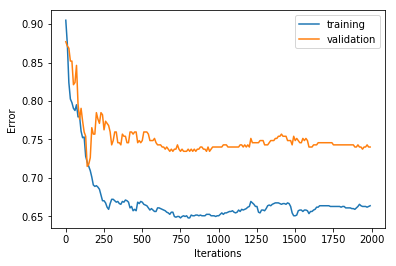

In [21]:
import matplotlib.pyplot as plt

plt.xlabel('Iterations')
plt.ylabel('Error')


training_label, = plt.plot(iter_counts, training_accuracy, label="training")
validation_label, =  plt.plot(iter_counts, validation_accuracy, label="validation")

plt.legend(handles=[training_label, validation_label])
# plt.axis([iter_counts[0], iter_counts[-1], 0.0, 0.5])

plt.show()

In [22]:
accuracy_score(Y[test_index], clf.predict(X[test_index]))

0.27945205479452057

In [23]:
from sklearn import tree

iter_counts = [i for i in range(5, 1000, 5)]
training_accuracy = []
validation_accuracy = []

for iter_count in iter_counts:
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=iter_count)

    clf.fit(X[training_index], Y[training_index])       
    
    training_accuracy.append(1 - accuracy_score(Y[training_index], clf.predict(X[training_index])))
    validation_accuracy.append(1- accuracy_score(Y[validation_index], clf.predict(X[validation_index])))

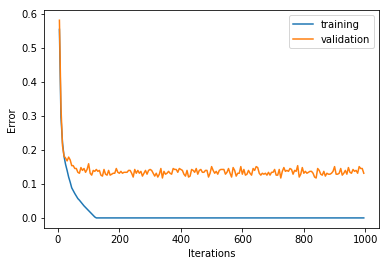

In [24]:
import matplotlib.pyplot as plt

plt.xlabel('Iterations')
plt.ylabel('Error')


training_label, = plt.plot(iter_counts, training_accuracy, label="training")
validation_label, =  plt.plot(iter_counts, validation_accuracy, label="validation")

plt.legend(handles=[training_label, validation_label])
# plt.axis([iter_counts[0], iter_counts[-1], 0.0, 0.5])

plt.show()

In [26]:
accuracy_score(Y[test_index], clf.predict(X[test_index]))

0.88767123287671235